In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | uyuni
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | nicoya
Processing Record 5 of Set 1 | soma
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | nevsehir
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | hualmay
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | ostrovnoy
Processing Record 17 of Set 1 | coihaique
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | jumla
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping.

Processing Record 41 of Set 4 | finschhafen
Processing Record 42 of Set 4 | corinto
Processing Record 43 of Set 4 | port hedland
Processing Record 44 of Set 4 | zhangye
Processing Record 45 of Set 4 | troitskoye
Processing Record 46 of Set 4 | watsa
Processing Record 47 of Set 4 | tromso
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | hami
Processing Record 50 of Set 4 | chadiza
Processing Record 1 of Set 5 | mendota
Processing Record 2 of Set 5 | bereda
Processing Record 3 of Set 5 | mount gambier
Processing Record 4 of Set 5 | naze
Processing Record 5 of Set 5 | husavik
Processing Record 6 of Set 5 | avera
Processing Record 7 of Set 5 | lata
Processing Record 8 of Set 5 | nalut
Processing Record 9 of Set 5 | kombai
Processing Record 10 of Set 5 | belle fourche
Processing Record 11 of Set 5 | tessalit
Processing Record 12 of Set 5 | kurilsk
Processing Record 13 of Set 5 | mrirt
City not found. Skipping...
Processing Record 14 of Set 5 | narsaq
Processing Recor

Processing Record 32 of Set 8 | barcelos
Processing Record 33 of Set 8 | pilar
Processing Record 34 of Set 8 | tazovskiy
Processing Record 35 of Set 8 | fayaoue
Processing Record 36 of Set 8 | grindavik
Processing Record 37 of Set 8 | westport
Processing Record 38 of Set 8 | camocim
Processing Record 39 of Set 8 | igrim
Processing Record 40 of Set 8 | saint-leu
Processing Record 41 of Set 8 | hofn
Processing Record 42 of Set 8 | hobro
Processing Record 43 of Set 8 | balaipungut
Processing Record 44 of Set 8 | young
Processing Record 45 of Set 8 | falealupo
City not found. Skipping...
Processing Record 46 of Set 8 | neftcala
Processing Record 47 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 8 | shaoxing
Processing Record 49 of Set 8 | arkhara
Processing Record 50 of Set 8 | lev tolstoy
Processing Record 1 of Set 9 | yucca valley
Processing Record 2 of Set 9 | port keats
Processing Record 3 of Set 9 | candawaga
City not found. Skipping...
Processing Reco

Processing Record 20 of Set 12 | monkey hill
Processing Record 21 of Set 12 | junagarh
Processing Record 22 of Set 12 | marawi
Processing Record 23 of Set 12 | zapotiltic
Processing Record 24 of Set 12 | la rioja
Processing Record 25 of Set 12 | strelka
Processing Record 26 of Set 12 | kez
Processing Record 27 of Set 12 | willowmore
Processing Record 28 of Set 12 | victoria point
Processing Record 29 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 30 of Set 12 | nisia floresta
Processing Record 31 of Set 12 | port hardy
Processing Record 32 of Set 12 | warqla
City not found. Skipping...
Processing Record 33 of Set 12 | labutta
City not found. Skipping...
Processing Record 34 of Set 12 | orange walk
Processing Record 35 of Set 12 | nova olimpia
Processing Record 36 of Set 12 | lamu
Processing Record 37 of Set 12 | varna
Processing Record 38 of Set 12 | cabedelo
Processing Record 39 of Set 12 | ketchikan
Processing Record 40 of Set 12 | dodge city
Processing Record 41 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Uyuni,-20.4597,-66.8250,50.38,11,61,9.78,BO,2022-04-26 22:46:19
1,Hermanus,-34.4187,19.2345,56.79,77,0,9.22,ZA,2022-04-26 22:43:52
2,Nicoya,10.1483,-85.4520,83.93,70,95,5.93,CR,2022-04-26 22:46:21
3,Soma,39.1855,27.6094,59.76,74,91,5.88,TR,2022-04-26 22:46:21
4,Lompoc,34.6391,-120.4579,65.84,69,0,28.99,US,2022-04-26 22:46:22
5,Nevsehir,38.9167,34.6667,49.21,54,0,1.14,TR,2022-04-26 22:46:22
6,Mataura,-46.1927,168.8643,52.48,97,96,2.86,NZ,2022-04-26 22:46:23
7,Busselton,-33.6500,115.3333,55.11,89,40,7.07,AU,2022-04-26 22:41:29
8,Hualmay,-11.0964,-77.6139,68.50,84,42,9.71,PE,2022-04-26 22:46:23
9,Barrow,71.2906,-156.7887,10.42,79,100,13.80,US,2022-04-26 22:45:14


In [45]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [46]:
city_data_df = city_data_df[new_column_order]

In [47]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [51]:
file_to_read = 'weather_data/cities.csv'
city_data_df = pd.read_csv(file_to_read)
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Uyuni,BO,2022-04-26 22:46:19,-20.4597,-66.8250,50.38,11,61,9.78
1,1,Hermanus,ZA,2022-04-26 22:43:52,-34.4187,19.2345,56.79,77,0,9.22
2,2,Nicoya,CR,2022-04-26 22:46:21,10.1483,-85.4520,83.93,70,95,5.93
3,3,Soma,TR,2022-04-26 22:46:21,39.1855,27.6094,59.76,74,91,5.88
4,4,Lompoc,US,2022-04-26 22:46:22,34.6391,-120.4579,65.84,69,0,28.99
...,...,...,...,...,...,...,...,...,...,...
566,566,Umm Kaddadah,SD,2022-04-26 23:04:00,13.6017,26.6876,83.10,27,100,4.50
567,567,Mogadishu,SO,2022-04-26 23:04:01,2.0371,45.3438,82.63,73,86,5.03
568,568,Porto Empedocle,IT,2022-04-26 23:04:02,37.2934,13.5264,58.59,64,1,5.64
569,569,Berck,FR,2022-04-26 23:04:03,50.4000,1.6000,42.78,87,0,4.61


In [52]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

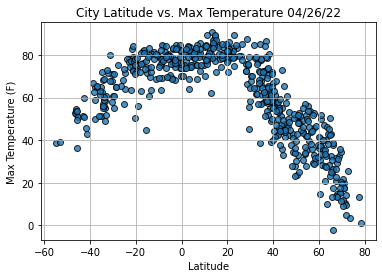

In [53]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

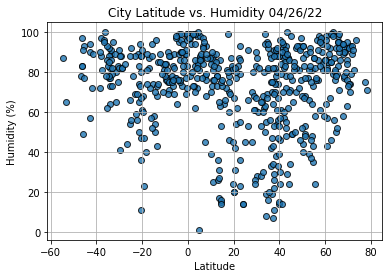

In [54]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

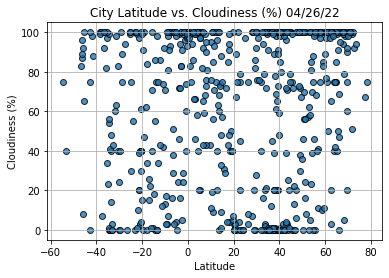

In [55]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

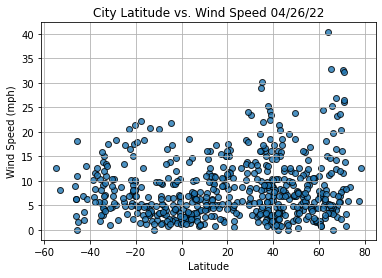

In [56]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [57]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [58]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                    Ostrovnoy
Country                        RU
Date          2022-04-26 22:46:26
Lat                       68.0531
Lng                       39.5131
Max Temp                    14.77
Humidity                       77
Cloudiness                      5
Wind Speed                  23.22
Name: 13, dtype: object

In [59]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
566     True
567     True
568     True
569     True
570     True
Name: Lat, Length: 571, dtype: bool

In [60]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Nicoya,CR,2022-04-26 22:46:21,10.1483,-85.4520,83.93,70,95,5.93
3,3,Soma,TR,2022-04-26 22:46:21,39.1855,27.6094,59.76,74,91,5.88
4,4,Lompoc,US,2022-04-26 22:46:22,34.6391,-120.4579,65.84,69,0,28.99
5,5,Nevsehir,TR,2022-04-26 22:46:22,38.9167,34.6667,49.21,54,0,1.14
9,9,Barrow,US,2022-04-26 22:45:14,71.2906,-156.7887,10.42,79,100,13.80


In [61]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

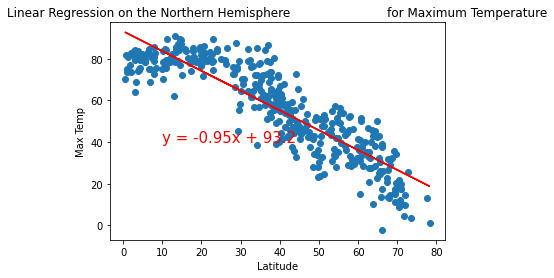

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

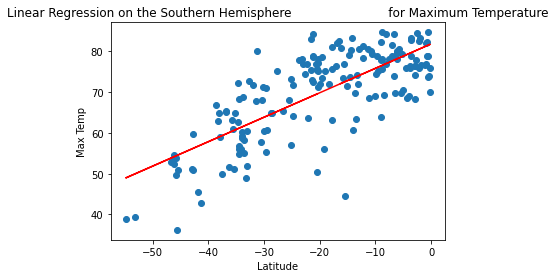

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

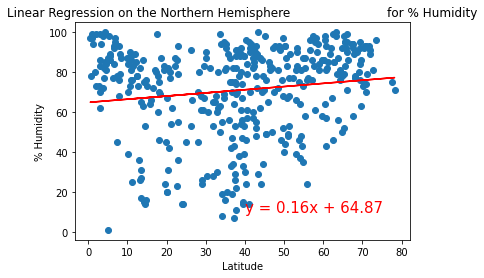

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


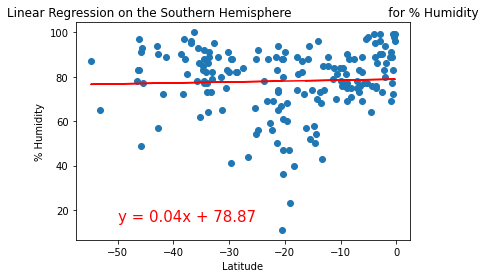

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

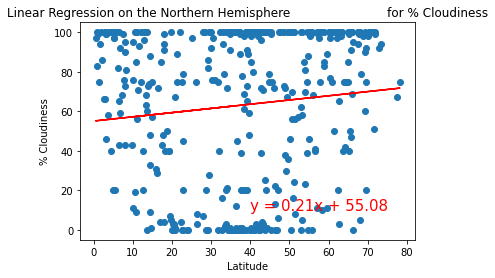

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

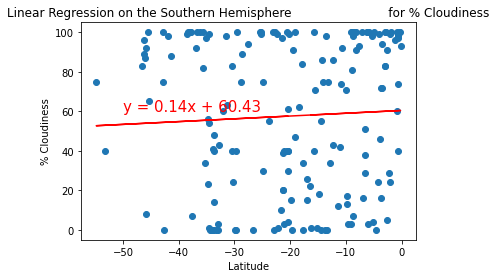

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

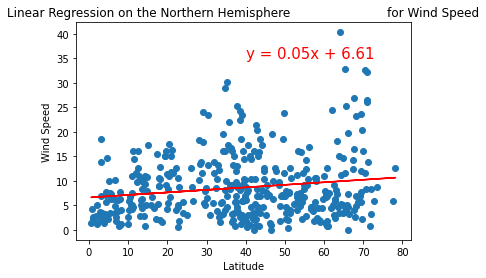

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

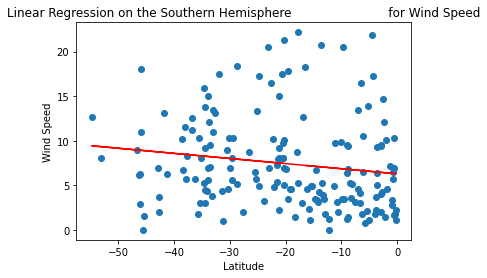

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))